# Anna Ciji Panakkal

## Milestone 2

### Research question/interests
My main resarch interest is if the crowd attendance affects the number of goals scored in the game in any way (increase with more attendance or vice-versa)


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as plt
import seaborn as sns

rawData = pd.read_csv("../data/raw/WorldCupMatches.csv")
rawData

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Milestone 3

### Task 1: EDA and Task 2: Analysis Pipeline

In [ ]:
#dropping all NaN values so that we have cleaner data
rawData = rawData.dropna()
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 0 to 851
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  850 non-null    float64
 1   Datetime              850 non-null    object 
 2   Stage                 850 non-null    object 
 3   Stadium               850 non-null    object 
 4   City                  850 non-null    object 
 5   Home Team Name        850 non-null    object 
 6   Home Team Goals       850 non-null    float64
 7   Away Team Goals       850 non-null    float64
 8   Away Team Name        850 non-null    object 
 9   Win conditions        850 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  850 non-null    float64
 12  Half-time Away Goals  850 non-null    float64
 13  Referee               850 non-null    object 
 14  Assistant 1           850 non-null    object 
 15  Assistant 2           8

In [ ]:
#finding information about the dataset
rawData.shape

(850, 20)

In [ ]:
rawData.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
rawData.tail()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
847,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC
848,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
849,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG


In [ ]:
rawData.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,8.500000e+02,8.500000e+02
mean,1985.021176,1.810588,1.022353,45164.800000,0.710588,0.429412,1.068626e+07,6.078489e+07
std,22.431301,1.612125,1.088853,23485.249247,0.937885,0.691752,2.732359e+07,1.105805e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188250e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.184000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [ ]:
rawData.nunique()

Year                     20
Datetime                601
Stage                    23
Stadium                 181
City                    151
Home Team Name           78
Home Team Goals          11
Away Team Goals           7
Away Team Name           83
Win conditions           43
Attendance              622
Half-time Home Goals      7
Half-time Away Goals      6
Referee                 366
Assistant 1             387
Assistant 2             408
RoundID                 101
MatchID                 835
Home Team Initials       77
Away Team Initials       82
dtype: int64

In [ ]:
#cleaning my dataset to have only columns that I need
cleanData = rawData.drop(['Stage', 'Win conditions', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
cleanData

,Year,Datetime,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance
0,1930.0,13 Jul 1930 - 15:00,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0
1,1930.0,13 Jul 1930 - 15:00,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0
3,1930.0,14 Jul 1930 - 14:50,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0
4,1930.0,15 Jul 1930 - 16:00,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0
...,...,...,...,...,...,...,...,...,...
847,2014.0,05 Jul 2014 - 17:00,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,51179.0
848,2014.0,08 Jul 2014 - 17:00,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,58141.0
849,2014.0,09 Jul 2014 - 17:00,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,63267.0
850,2014.0,12 Jul 2014 - 17:00,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,68034.0


C:\Users\ANNA\AppData\Local\Temp\ipykernel_8876\1631158309.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = cleanData.corr()


<AxesSubplot: >

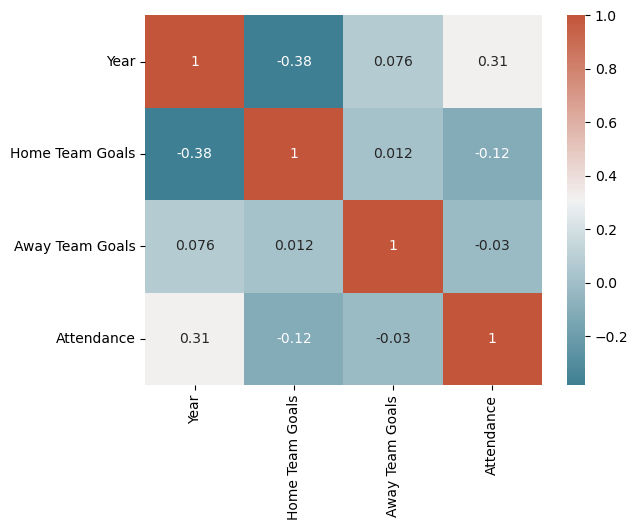

In [ ]:
#calculating the correlation matrix
corrMatrix = cleanData.corr()
sns.heatmap(corrMatrix, xticklabels=corrMatrix.columns, yticklabels=corrMatrix.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


##### Since this plot does not give much information on my research topic, we will plot histograms to see if we can get more useful information

<AxesSubplot: title={'center': 'For Home Team Goals'}, xlabel='Home Team Goals'>

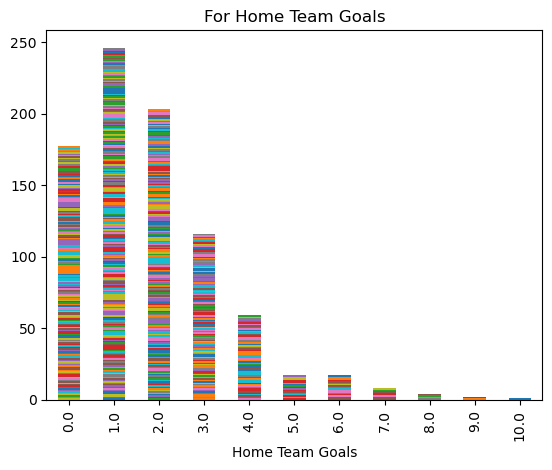

In [ ]:
cleanData.groupby(['Home Team Goals', 'Attendance']).size().unstack().plot(kind='bar', stacked=True, legend = False, title='For Home Team Goals')

<AxesSubplot: title={'center': 'For Away Team Goals'}, xlabel='Away Team Goals'>

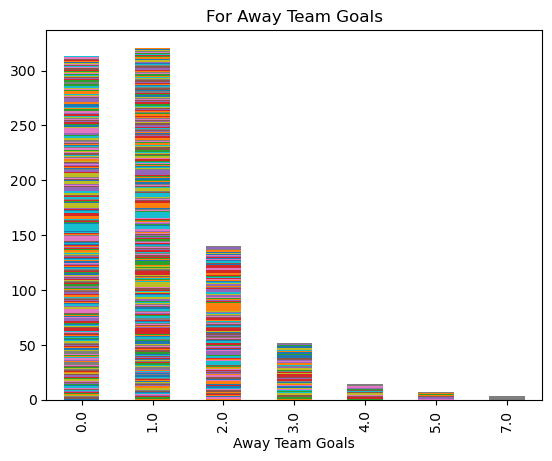

In [ ]:
cleanData.groupby(['Away Team Goals', 'Attendance']).size().unstack().plot(kind='bar', stacked=True, legend = False, title='For Away Team Goals')

##### These histograms tells us the trends of attendance and how it affects the goals scored by the home teams or away teams. As you can see, higher the attendance, lower the number of goals scored. I have taken off the legend as it was too long but it showed the color for each frequency. We also notice that the home team scores more goals in general with more crowd attendance(I am assuming since moreof their fans will be present in the stadium)

<seaborn.axisgrid.PairGrid>

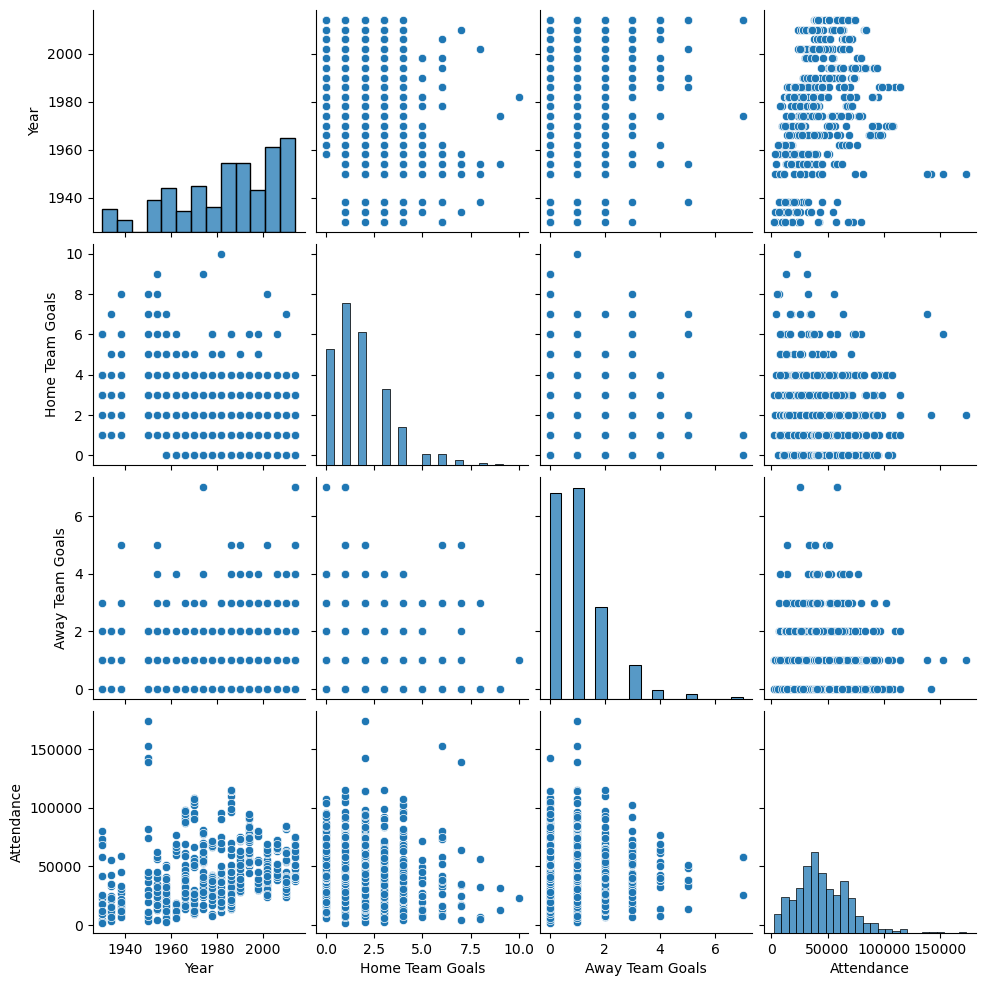

In [ ]:
# to see if there are any trends in the different plots that I have missed
sns.pairplot(cleanData)

### Task 2: Analysis Pipeline

In [ ]:
# 1. Load Data
rawData = pd.read_csv("../data/raw/WorldCupMatches.csv")
rawData = rawData.dropna()
print(rawData.shape)

(850, 20)


In [ ]:
# 2. Clean Data
cleanData = rawData.drop(['Stage', 'Win conditions', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'], axis=1)
cleanData.reset_index()
print(cleanData.shape)
print(cleanData.head())
print(cleanData.tail())

(850, 9)
     Year              Datetime         Stadium         City Home Team Name  \
0  1930.0  13 Jul 1930 - 15:00          Pocitos  Montevideo          France   
1  1930.0  13 Jul 1930 - 15:00   Parque Central  Montevideo             USA   
2  1930.0  14 Jul 1930 - 12:45   Parque Central  Montevideo      Yugoslavia   
3  1930.0  14 Jul 1930 - 14:50          Pocitos  Montevideo         Romania   
4  1930.0  15 Jul 1930 - 16:00   Parque Central  Montevideo       Argentina   

   Home Team Goals  Away Team Goals Away Team Name  Attendance  
0              4.0              1.0         Mexico      4444.0  
1              3.0              0.0        Belgium     18346.0  
2              2.0              1.0         Brazil     24059.0  
3              3.0              1.0           Peru      2549.0  
4              1.0              0.0         France     23409.0  
       Year              Datetime              Stadium             City  \
847  2014.0  05 Jul 2014 - 17:00      Arena Fonte N

In [ ]:
# 3. Process Data
cleanData['Total Goals'] = cleanData['Home Team Goals'] + cleanData['Away Team Goals']
cleanData = cleanData.sort_values('Attendance', ascending=False)

In [ ]:
cleanData

,Year,Datetime,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Total Goals
74,1950.0,16 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Uruguay,2.0,1.0,Brazil,173850.0,3.0
71,1950.0,13 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6.0,1.0,Spain,152772.0,7.0
63,1950.0,01 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,2.0,0.0,Yugoslavia,142429.0,2.0
70,1950.0,09 Jul 1950 - 15:00,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,7.0,1.0,Sweden,138886.0,8.0
379,1986.0,07 Jun 1986 - 12:00,Estadio Azteca,Mexico City,Mexico,1.0,1.0,Paraguay,114600.0,2.0
...,...,...,...,...,...,...,...,...,...,...
67,1950.0,02 Jul 1950 - 15:40,Eucaliptos,Porto Alegre,Switzerland,2.0,1.0,Mexico,3580.0,3.0
27,1934.0,31 May 1934 - 16:30,San Siro,Milan,Germany,2.0,1.0,Sweden,3000.0,3.0
127,1958.0,17 Jun 1958 - 19:00,Rasunda Stadium,Solna,Wales,2.0,1.0,Hungary,2823.0,3.0
3,1930.0,14 Jul 1930 - 14:50,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,4.0


## Task 3: Method Chaining

##### cleaning up task 2 (will transfer to a python file once done)

In [ ]:
# method chaining imports
import pandas as pd

def load_and_process(filePath):
   
    # Method Chain 1 (Load data, drop na rows, drop unneeded columns)
    
    # Preparing list needed
    unneededColumns = ['Stage', 'Win conditions', 'Half-time Home Goals', 'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials']    
    
    df1 = (
        pd.read_csv("../data/raw/WorldCupMatches.csv")
        .dropna()
        .drop(unneededColumns, axis=1)
        .reset_index(drop=True)
    )
 

In [ ]:
# Method Chain 2 (adding column with values for winner) 
    
# Preparing function needed
def total_attendance (row):
    total_goals= cleanData['Home Team Goals'] + cleanData['Away Team Goals']    
    
    df1['Total Goals'] = (
        df1
        .apply (lambda row: total_attendance(row), axis=1)
    )
    return df1

##### Testing my method to make sure it works and outputs as I intended.

In [ ]:
clean = load_and_process("../data/raw/WorldCupMatches.csv")
clean

##### transfering the method and imports to my functions python file and test again.

In [ ]:
import project_functions3 as p3
test = p3.load_and_process("../data/raw/WorldCupMatches.csv")
test

## Task 4: Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import project_functions3 as p3
%matplotlib inline

In [ ]:
df = p1.load_and_process("../data/raw/WorldCupMatches.csv")
df

,Year,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Winner
0,1930.0,France,4.0,1.0,Mexico,Home Team
1,1930.0,USA,3.0,0.0,Belgium,Home Team
2,1930.0,Yugoslavia,2.0,1.0,Brazil,Home Team
3,1930.0,Romania,3.0,1.0,Peru,Home Team
4,1930.0,Argentina,1.0,0.0,France,Home Team
...,...,...,...,...,...,...
845,2014.0,Netherlands,0.0,0.0,Costa Rica,Other
846,2014.0,Brazil,1.0,7.0,Germany,Away Team
847,2014.0,Netherlands,0.0,0.0,Argentina,Other
848,2014.0,Brazil,0.0,3.0,Netherlands,Away Team


In [ ]:
df['Total Goals'].value_counts().plot.bar(x='Total goals',y='Attendance', rot=0, title='Winner of the Game')

KeyError: 'Total Goals'

##### From this we can conclude that, higher the number of attendance, chances are scores goals are less likely scored, which is a surprising outcome considering the fact that we wouul hav expected the vice versa because of morale boosts. Soccer/football (whatever you call in your country) is truly a game of concentration.

In [ ]:
df.groupby(['Attendance', 'Total Goals']).size().unstack().plot(kind='bar', stacked=True, title='attendance')

##### from this we can conclude that attendance and number of goals scored have an inversely propotional relationship